# Курсова робота з Математичного Моделювання

### Моделювання росту чисельності ізольованих популяцій. Модель Хатчинсона

## Теоретичні відомості

Недоліком логістичної моделі є використання миттєвих значень 
народжуваності та смертності, що визначаються станом популяції 
в певний момент часу. 

Насправді народжуваність залежить від чисельності популяції в попередні 
моменти часу, тому що, наприклад, існує проміжок часу $\tau$ між моментами 
зачаття і народжування. Час статевого дозрівання теж зумовлює фактор 
запізнення. 

Смертність більшою мірою залежить від стану популяції в певний момент 
часу. Тоді логістичне рівняння переходить у рівняння із запізнюючим 
аргументом вигляду:

$$
\frac{dN}{dt} = r\left(1 - \frac{N(t - \tau)}{K}\right) N(t), \quad t \geq 0. \qquad (1)
$$

Таке рівняння називається *рівнянням Хатчинсона* (Hutchinson, 1948). Тут $r > 0$ - коефіцієнт лінійного росту, $K > 0$ - середня чисельність у популяції, $\tau > 0$ - запізнення.


Рівняння (1) можна одержати ще й із таких міркувань. У реальній екосистемі ресурси самовідновлюються. Тому реальний рівень ресурсів, доступних у момент часу $t$, залежатиме від щільності виду в момент $t - \tau$, де $\tau$ - час розвитку виду, який служить ресурсом. 

Для замикання рівнняня (1) необхідно задати початкову умову:

$$
N(t) = \phi(t), \quad t \in \left[ -\tau, 0 \right], \qquad (2)
$$

де $\phi(t) \geq 0$ - неперервна функція.

Розв'язок такої задачі існує, причому єдиний.

Запровадимо в (1) заміну змінних:

$$
s = \frac{t}{\tau}, \quad N(t) = \frac{K}{r\tau}x(s),
$$

Тоді отримаємо:

$$
\frac{dx}{ds} = (a_1 - x(s - 1))x(s), \qquad (3)
$$

де $a_1 = r\tau$. 

Нетривіальний стаціонарний розв'язок рівняння (3) має вигляд $x^{*} = a_1$.

Для дослідження стійкості вважатимемо, що $x(s) - a_1 = z(s)$

Відносно $z(s)$ одержуємо рівняння

$$
\frac{dz}{ds} = -z\left(s - 1 \right)\left(z(s) + a_1 \right).
$$


Лінеаризуючи останнє рівняння, отримаємо:

$$
\frac{dz}{ds} + a_1 z(s-1) = 0. \qquad (4)
$$

Розв'язок цього рівнняня шукаємо у вигляді:

$$
z(s) = e^{\gamma s}, \quad \gamma = \alpha + i\beta, \quad i = \sqrt{-1}
$$

Для показника $\gamma$ маємо характеристичне рівняння:

$$
\gamma e^{\gamma} + a_1 = 0. \qquad (5)
$$

Рівновага $x^{*}$ буде стійкою (асимптотично) тоді й тільки тоді, коли корені характеристичного рівнняня мають від'ємні дійсні частини.

При $0 < a_1 < \frac{\pi}{2}$ нетривіальна рівновага в рівнянні із запізненням стійка (як і без запізнення).

## Комп'ютерна реалізація моделі

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output

def initial_condition(t, N0):
    """Initial history function"""
    return N0 * np.cos(0.01 * t)

def get_delayed_value(N, i, n_delay, t, tau, N0):
    """Get the delayed value N(t-tau), using initial condition if necessary"""
    if i < n_delay:
        return initial_condition(t - tau, N0)
    return N[i - n_delay]

def dN_dt(N_t, N_tau, r, K):
    """The right-hand side of the DDE: dN/dt = r*N(t)*(1 - N(t-tau)/K)"""
    return r * N_t * (1 - N_tau/K)

def solve_delay_logistic_rk4(r, K, tau, N0, t_max=200, dt=0.001):
    """
    Solve the delayed logistic equation using RK4 method:
    dN/dt = r*N(t)*(1 - N(t-tau)/K)
    """
    # Create time array
    t = np.arange(0, t_max, dt)
    n_points = len(t)
    
    # Calculate number of delay steps
    n_delay = int(tau/dt)
    
    # Initialize solution array
    N = np.zeros(n_points)
    
    # Set initial history using the initial condition function
    N[:n_delay] = initial_condition(t[:n_delay], N0)
    
    # Solve using RK4 method
    for i in range(n_delay - 1, n_points - 1):
        # Current time and value
        t_i = t[i]
        N_i = N[i]
        
        # RK4 coefficients
        # k1 = f(t_i, y_i)
        N_tau = get_delayed_value(N, i, n_delay, t_i, tau, N0)
        k1 = dN_dt(N_i, N_tau, r, K)
        
        # k2 = f(t_i + dt/2, y_i + dt*k1/2)
        N_tau = get_delayed_value(N, i + 1//2, n_delay, t_i + dt/2, tau, N0)
        k2 = dN_dt(N_i + dt*k1/2, N_tau, r, K)
        
        # k3 = f(t_i + dt/2, y_i + dt*k2/2)
        N_tau = get_delayed_value(N, i + 1//2, n_delay, t_i + dt/2, tau, N0)
        k3 = dN_dt(N_i + dt*k2/2, N_tau, r, K)
        
        # k4 = f(t_i + dt, y_i + dt*k3)
        N_tau = get_delayed_value(N, i + 1, n_delay, t_i + dt, tau, N0)
        k4 = dN_dt(N_i + dt*k3, N_tau, r, K)
        
        # Update solution using RK4 formula
        N[i + 1] = N_i + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    return t, N, n_delay

def plot_solution_hutchinson(r=0.16, K=1.1, tau=10, N0=1.0, max_time=200):
    """Create plots for the solution"""
    clear_output(wait=True)
    
    # Check for instability condition
    if r * tau >= np.pi / 2:
        print("Caution, result may be unstable! Check r and τ parameters.")
    
    # Solve the equation with the specified max_time
    t, N, n_delay = solve_delay_logistic_rk4(r, K, tau, N0, t_max=max_time)
    
    # Create figure with a single subplot (only time series plot)
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Time series plot (skip initial transients)
    skip_points = n_delay  # Skip first few time units
    ax1.plot(t[skip_points:], N[skip_points:], 'b-', lw=1.5)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('N(t)')
    ax1.grid(True)
    ax1.set_title(f'Time Series (r={r:.3f}, K={K:.3f}, τ={tau:.3f}, N₀={N0:.3f}, T={max_time})')
    
    plt.tight_layout()
    plt.show()

# Interactive interface
interact(plot_solution_hutchinson,
        r=FloatSlider(min=0.05, max=1.4, step=0.001, value=0.16, description='r'),
        K=FloatSlider(min=0.5, max=1000.0, step=0.001, value=1.1, description='K'),
        tau=FloatSlider(min=0.001, max=20.0, step=0.001, value=10, description='τ'),
        N0=FloatSlider(min=0.1, max=2000, step=0.1, value=1.0, description='N₀'),
        max_time=FloatSlider(min=50, max=500, step=1, value=200, description='T'))


interactive(children=(FloatSlider(value=0.16, description='r', max=1.4, min=0.05, step=0.001), FloatSlider(val…

<function __main__.plot_solution_hutchinson(r=0.16, K=1.1, tau=10, N0=1.0, max_time=200)>

# Порівняння особливостей роботи моделі для різних наборів вхідних параметрів

# Перевірка моделі на адекватність

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def compare_parameters(param_name, param_values, fixed_params, max_time=200):
    """
    Compare the solution of the delayed logistic model for different values of a specified parameter,
    while also showing the values of the other fixed parameters.

    Parameters:
        param_name (str): The name of the parameter to vary ('r', 'K', 'tau', 'N0').
        param_values (list): List of values for the parameter to compare.
        fixed_params (dict): Dictionary of fixed parameters ('r', 'K', 'tau', 'N0').
        max_time (float): Maximum time for the simulation (default is 200).
    """
    # Create a figure with multiple subplots
    fig, ax = plt.subplots(1, len(param_values), figsize=(15, 5))
    
    # Extract values of the fixed parameters
    r_fixed = fixed_params['r']
    K_fixed = fixed_params['K']
    tau_fixed = fixed_params['tau']
    N0_fixed = fixed_params['N0']
    
    # Iterate over the parameter values to be compared
    for i, value in enumerate(param_values):
        # Copy the fixed parameters and set the current parameter value
        params = fixed_params.copy()
        params[param_name] = value
        
        # Solve the equation for the current parameter set
        t, N, n_delay = solve_delay_logistic_rk4(params['r'], params['K'], params['tau'], params['N0'], t_max=max_time)
        skip_points = n_delay  # Skip initial transients
        
        # Plot the result
        ax[i].plot(t[skip_points:], N[skip_points:], label=f'{param_name}={value}')
        ax[i].set_title(f'{param_name}={value}\nDefault Parameters:(r={r_fixed}, K={K_fixed}, τ={tau_fixed}, N₀={N0_fixed})')
        ax[i].set_xlabel('Time')
        ax[i].set_ylabel('N(t)')
        ax[i].grid(True)
    
    plt.tight_layout()
    plt.show()



#### 1. Робота моделі при малих значеннях затримки та малому значенні ємності середовища

In [70]:
# Example of using this function:
# Set fixed parameters
fixed_params = {
    'r': 0.16,
    'K': 1, # мала ємність середовища
    'tau': 1, # мале значення затримки
    'N0': 0.9
}


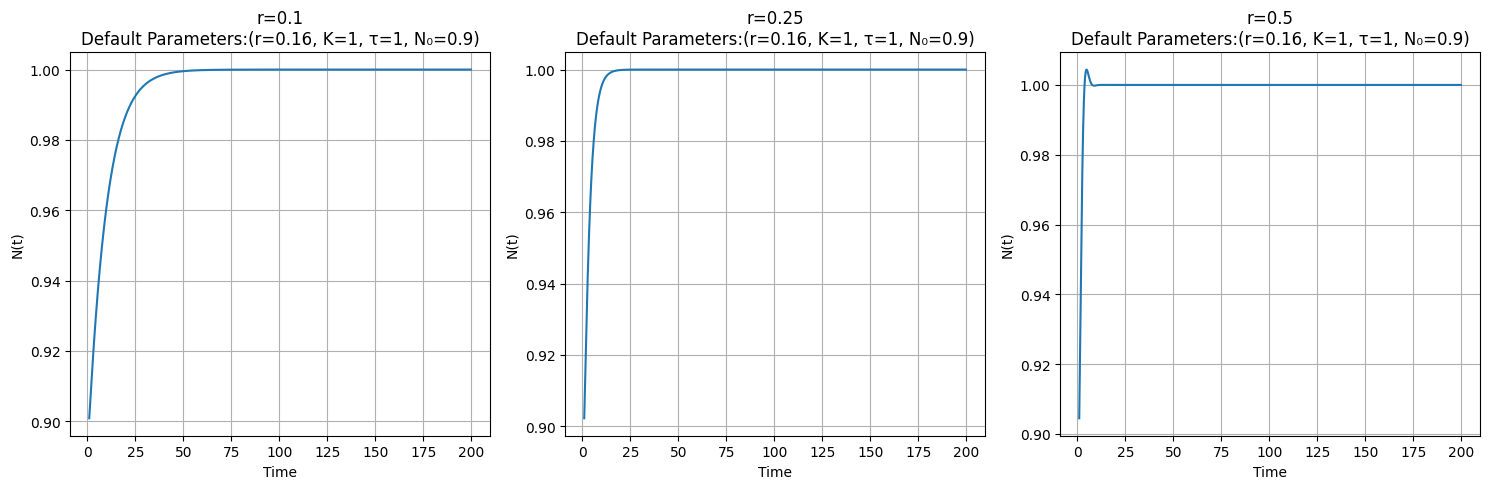

In [71]:
r_values = [0.1, 0.25, 0.5]
compare_parameters('r', r_values, fixed_params, max_time=200)


Для малої ємності середовища, та малого значення запізнення, зі зміною параметра $r$ особливих змін не було помічено.

Чисельність населення стрімко зростає за короткий проміжок часу. Чим більший коефіцієнт лінійного приросту $r$ - тим більш стрімко відбувається зростання кількості населення до кількості - рівній максимальній ємкості середовища.



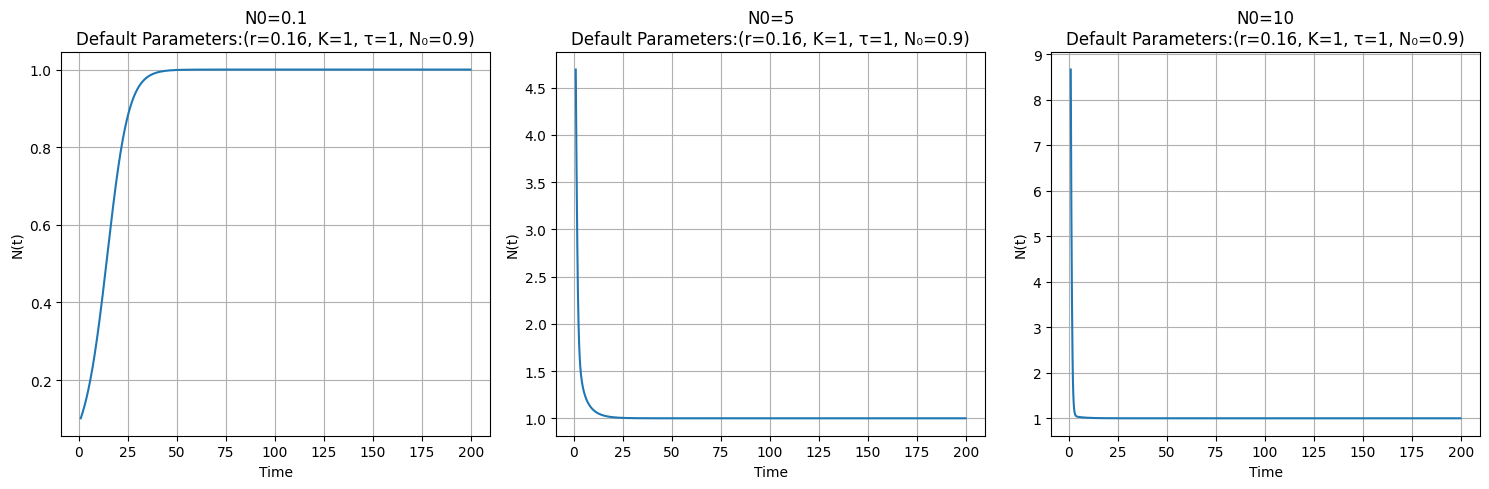

In [73]:
N0_values = [0.1, 5, 10]
compare_parameters('N0', N0_values, fixed_params, max_time=200)

Для поданих вище графіків, спостерігається аналогічна ситуація:

- При низькій початковій чисельності, населення стрімко зростає і закріплюється на позначці ємності середовища

- При високі початковій чисельності, але малому показникові ємності середовища, спостерігається стрімке падіння чисельності, та закріплення на показнику максимальної ємності.

- При ще більшій початковій чисельності, падіння чисельності населення відбувається більш стрімкими темпами на відрізку $t \in [0, 25]$

#### 2. Робота моделі при великих значеннях затримки та малому значенні ємності середовища

In [74]:
# Example of using this function:
# Set fixed parameters
fixed_params = {
    'r': 0.16,
    'K': 1,
    'tau': 10,
    'N0': 1.0
}

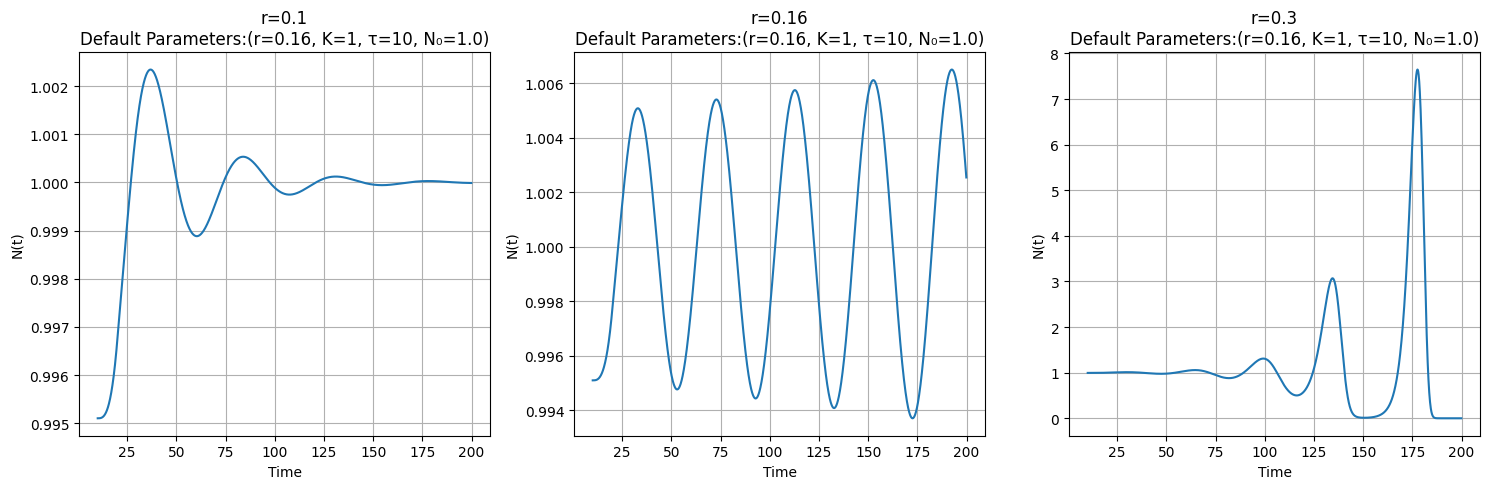

In [75]:
# Define small, medium, and large values for a parameter (e.g., 'r')
r_values = [0.1, 0.16, 0.3]
compare_parameters('r', r_values, fixed_params, max_time=200)

При великих значеннях затримки та малому значенні ємності середовища, спостерігається така ситуація:
    
- При відносно невеликому значенні параметру лінійного зростання $r$ в певний момент часу (в даному випадку $t > 175$) 
показник кількості населення популяції збігається до значення ємкості середовища $K$

- При збільшенні параметру $r$ на 0.05 графік демонструє поведінку хвилі, це можна пояснити тим, що через велике значення показника затримки, періодично виходить так, що старі представники популяції - помирають, а молоді, ще не є достатньо зрілими, для розмноження.

- При збільшенні параметру $r$ ще на 0.14 можна помітити, що чисельність популяції в певний момент (після 190) досягне показника 0, що відповідає нульовій кількості зрілого (дорослого) населення. 

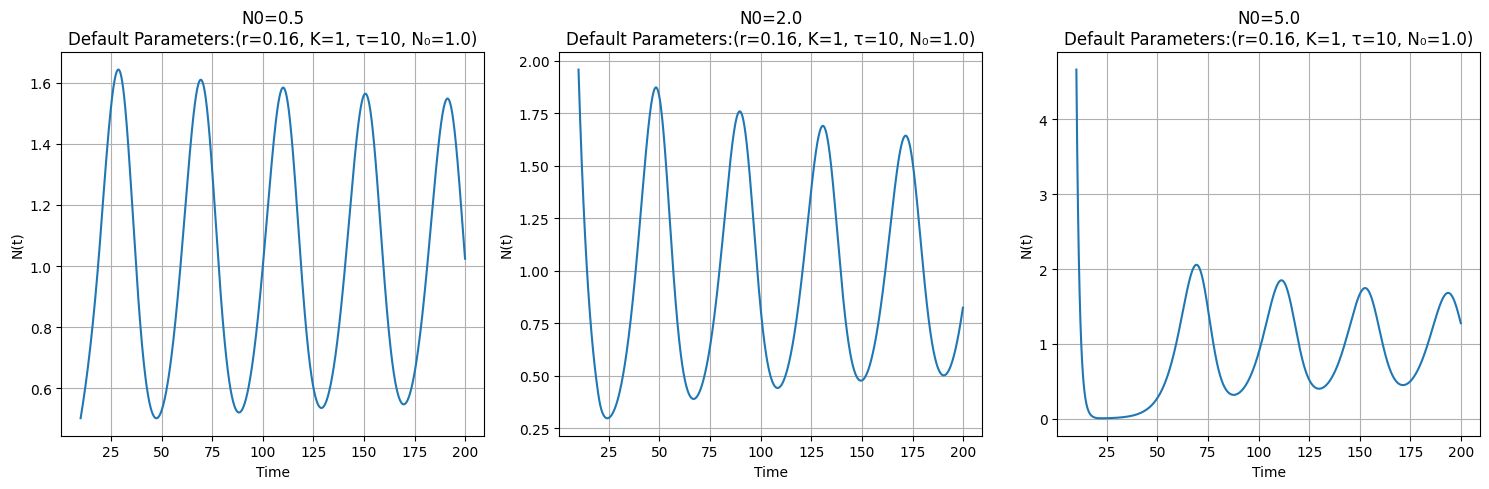

In [76]:
N0_values = [0.5, 2.0, 5.0]
compare_parameters('N0', N0_values, fixed_params, max_time=200)

В свою чергу, при фіксованому значенні $r$, та зміні початкової чисельності популяції, особливих змін не було помічено. З графіків видно, що кількість зрілих представників популяції коливається:

- В першому випадку, коли початкова чисельність менша за ємність середовища, - амплітуда поступово зменшується.

- В другому випадку, коли початкова чисельність більша, але на одиницю, - аналогічно з першим випадком.

- В третьому, коли початкова чисельність набагато більша за ємність - спостерігається період, під час якого кількість зрілого населення є дуже малою (від 20 до 50 часових кроків), що можна пояснити високою смертністю серед зрілого населення в короткий час, через невідповідність ємності середовища та кількості населення - (недостатньо ресурсів, смертність від голоду, хвороб тощо).

#### 3. Велика ємність середовища, мале запізнення (1 крок)

In [80]:
# Example of using this function:
# Set fixed parameters
fixed_params = {
    'r': 0.16,
    'K': 1000,
    'tau': 1,
    'N0': 1.0
}


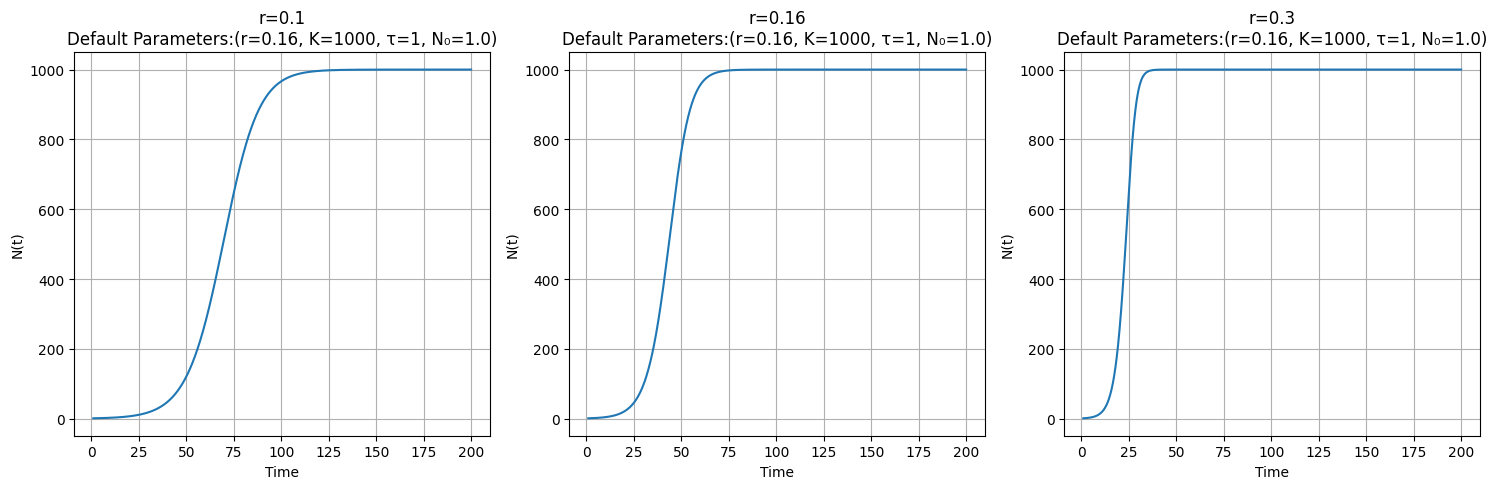

In [81]:
# Define small, medium, and large values for a parameter (e.g., 'r')
r_values = [0.1, 0.16, 0.3]
compare_parameters('r', r_values, fixed_params, max_time=200)

В більш загальному сенсі, від збільшення ємності середовища, результат не зазнав особливих змін, поведінка графіків ф-її $N(t)$ схожа на графіки з малою ємністю середовища. Але основна відмінність полягає в тому, що популяція досягає верхньої, обмежувальної відмітки - ємності середовища - набагато довше ніж, коли показник ємності є малим.

В даному випадку, можна помітити, що зі збільшенням значення параметра $r$ - темпи зростання чисельності населення збільшуються, як і має бути. 

- На першому графіку відмітки було досягнено за - 125 років (одиниць часу).

- На другому - за 75 років (одиниць часу).

- А на третьому - за 50 років (одиниць часу).

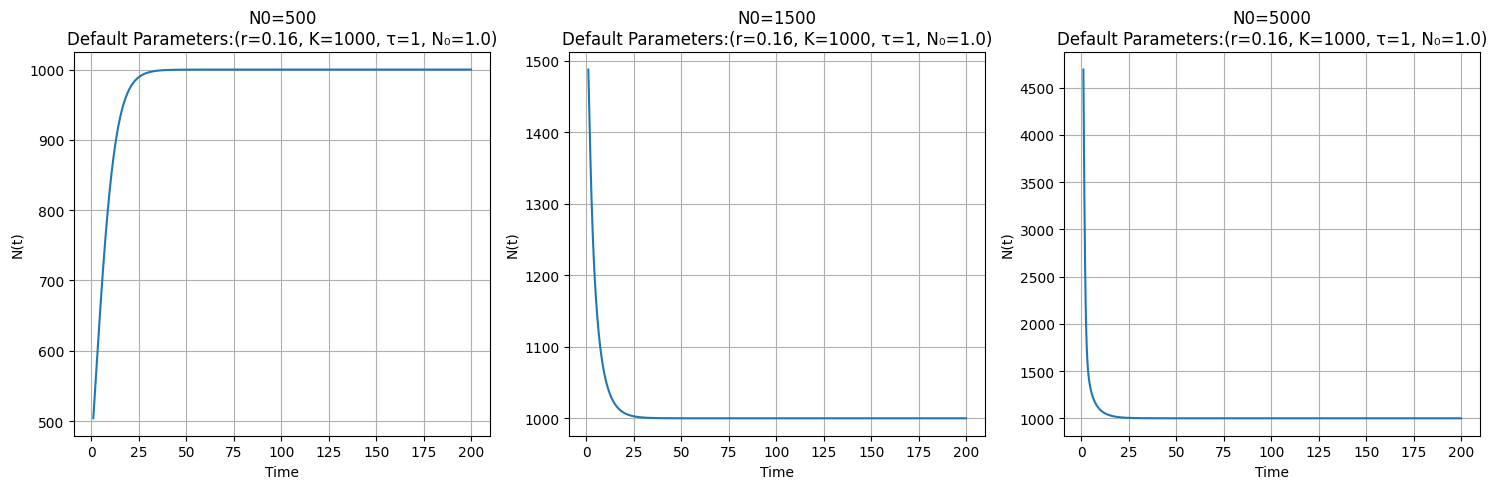

In [85]:
N0_values = [500, 1500, 5000]
compare_parameters('N0', N0_values, fixed_params, max_time=200)

На великій максимальній ємності середовища, зі зміною початкової кількості населення - модель працює так само як в пункті 1. Робота моделі при малих значеннях затримки та малому значенні ємності середовища.

#### Велика ємність середовища, велике запізнення

In [92]:
# Example of using this function:
# Set fixed parameters
fixed_params = {
    'r': 0.16,
    'K': 1000,
    'tau': 10,
    'N0': 1.0
}

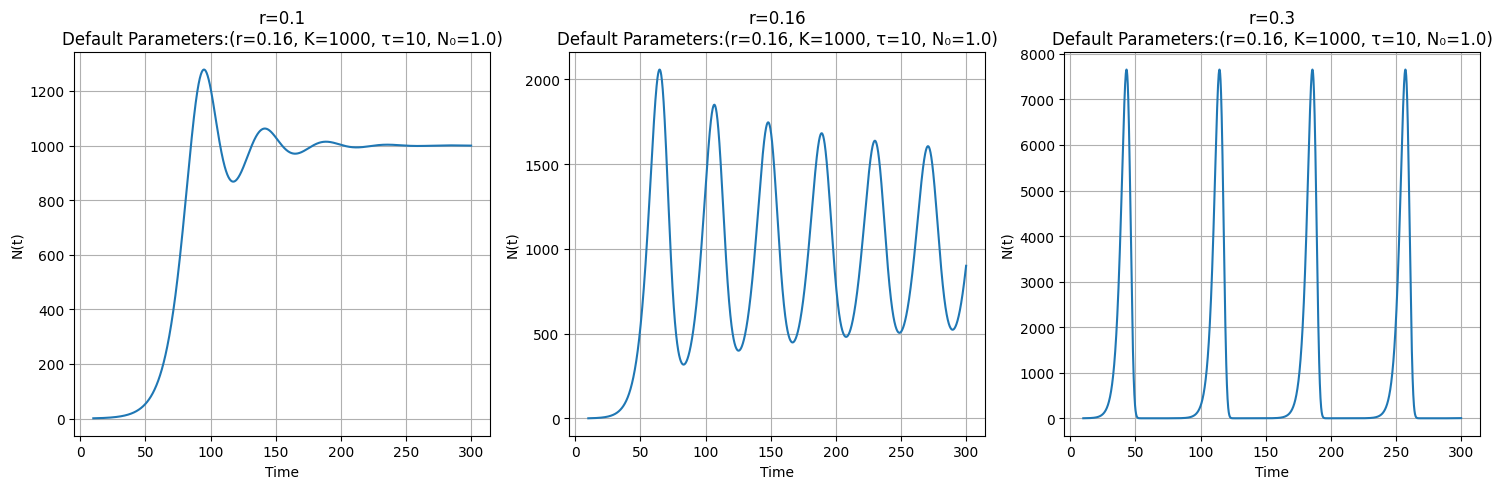

In [93]:
# Define small, medium, and large values for a parameter (e.g., 'r')
r_values = [0.1, 0.16, 0.3]
compare_parameters('r', r_values, fixed_params, max_time=300)

При великих показниках обох параметрів: запізнення та ємності середовища, мають місце такі особливості:

- На першому графіку, на початку чисельність населення поступово зростає, через досить низький показник лінійного приросту $r$, досягає піку чисельності населення, вищого за ємність середовища, тому поступово спадає, і стабілізується до показника максимальної ємності $K$.

- На другому графіку спостерігаємо хвилі збільшення та зменшення зрілого населення, через високе значення параметру запізнення $\tau$. Можна помітити, що при відносно середньому значенню показника $r$ амплітуда коливань чисельності населення стає все меншою і меншою з часом.

- На третьому графіку, при більшому значенні показника $r$ - спостерігається стрімкий але поступовий зріст населення до пікової точки - що є в 8 разів більшою за ємність середовища, після чого спостерігається стрімкий спад кількості зрілого населення до нуля. 

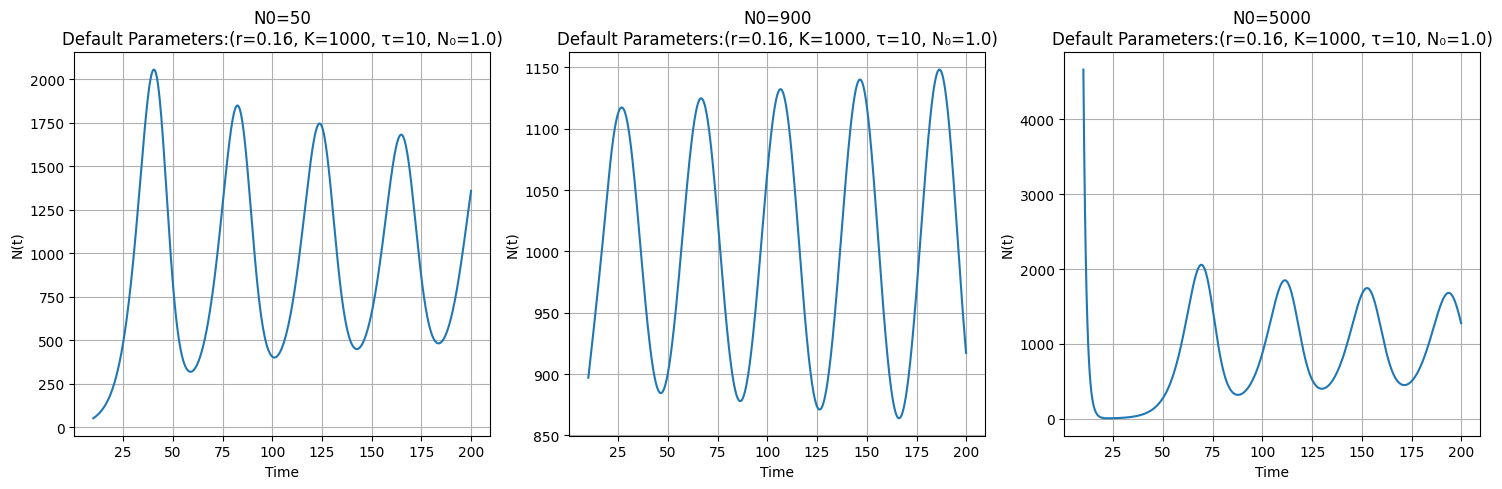

In [97]:
N0_values = [50, 900, 5000]
compare_parameters('N0', N0_values, fixed_params, max_time=200)

Для великої ємності середовища зі зміною початкової чисельності населення, висновки аналогічні до отриманих в пт. 2 Робота моделі при великих значеннях затримки та малому значенні ємності середовища. 

# Порівняння з іншими моделями

## Модель Мальтуса

Нехай маємо деякий біологічний вид, для якого існує необмежений запас використовуваних ресурсів. Позначимо чисельність популяції в момент часу $t$ через $N(t)$, тоді швидкість її зміни може бути подана як:

$$
\dot{N} = народжуваність - смертність + міграція
$$

У простішому випадку розглядається відсутність міграції та припускається, що народжуваність і смертність відбувається пропорційно загальній чисельності, тоді:

$$
\dot{N} = bN - dN \quad або \quad \dot{N} = aN, \quad a = b - d, \qquad (1)
$$

де $b$ - коефіцієнт народжуваності, $d$ - коефіцієнт смертності, $a$ - коефіцієнт швидкості розмноження популяції.

Розв'язком рівняння (1) при a = const є експоненціальна функція:

$$
N(t) = N_0e^{a(t - t_0)}
$$

де $N_0 = N(t_0)$ - це чисельність популяції в початковий момент часу $t = t_0$

Якщо $a > 0$, то популяція росте з експоненціальним ростом $\left(N(t) \to \infty \quad при \quad t \to \infty \right)$;

Якщо $a < 0$, то популяція вимирає $\left(N(t) \to 0 \quad при \quad t \to \infty \right)$

Величину $a$ ще називають біологічним потенціалом популяції або мультузіанським параметром популяції.

Експоненціальний характер зростання чисельності популяції часто проявляється за природних умов у короткочасні періоди, коли є достатньо їжі, немає скупченості, відсутні хижаки-вороги.

**Помилка мальтуса**

Якщо припустити, що ріст народонаселення мав завжди таку ж швидкість, що й зараз (подвоєння кількості за 40 років), то отримаємо висновок, що людство існує лише 32 покоління (близько 1300 років).

**Де модель можна використовувати**

Модель Мальтуса може бути застосовна на певних етапах (на обмежених часових інтервалах) до широкого класу динамічних процесів, які, насамперед, спостерігаються у лабораторних умовах: 
ріст мікробів, дріжджів, бактерій при наявності достатньої кількості поживних ресурсів у середовищі.

## Програмна реалізація моделі

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output

def malthus_population(t, N0, a):
    """
    Compute the population N(t) = N0 * exp(a * t)
    """
    return N0 * np.exp(a * t)

def plot_malthus_solution(a=0.1, N0=1.0, max_time=50):
    """
    Plot the solution for the Malthusian growth model
    """
    clear_output(wait=True)
    
    # Time array
    t = np.linspace(0, max_time, 500)
    
    # Compute the population
    N = malthus_population(t, N0, a)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(t, N, 'b-', lw=2, label=f'N(t) = {N0} * exp({a:.3f} * t)')
    plt.title(f'Malthusian Growth Model (a={a:.3f}, N₀={N0:.3f}, T={max_time})')
    plt.xlabel('Time')
    plt.ylabel('Population N(t)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interactive interface
interact(plot_malthus_solution,
         a=FloatSlider(min=0.01, max=1.0, step=0.01, value=0.1, description='a'),
         N0=FloatSlider(min=0.1, max=100.0, step=0.1, value=1.0, description='N₀'),
         max_time=FloatSlider(min=10, max=200, step=5, value=50, description='T'))


interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, min=0.01, step=0.01), FloatSlider(value…

<function __main__.plot_malthus_solution(a=0.1, N0=1.0, max_time=50)>

## Порівняння з моделлю Хатчинсона

На відміну від моделі Хатчинсона в рамках якої динаміка зростання/зменшення чисельності популяції має вигляд хвиль/коливань, або логістичної функції (оскільки є модифікацією логістичного рівнняння). Модель Мальтуса, приймає вигляд експоненційної функції, що можна бачити з графіку.


Приклад графіку:

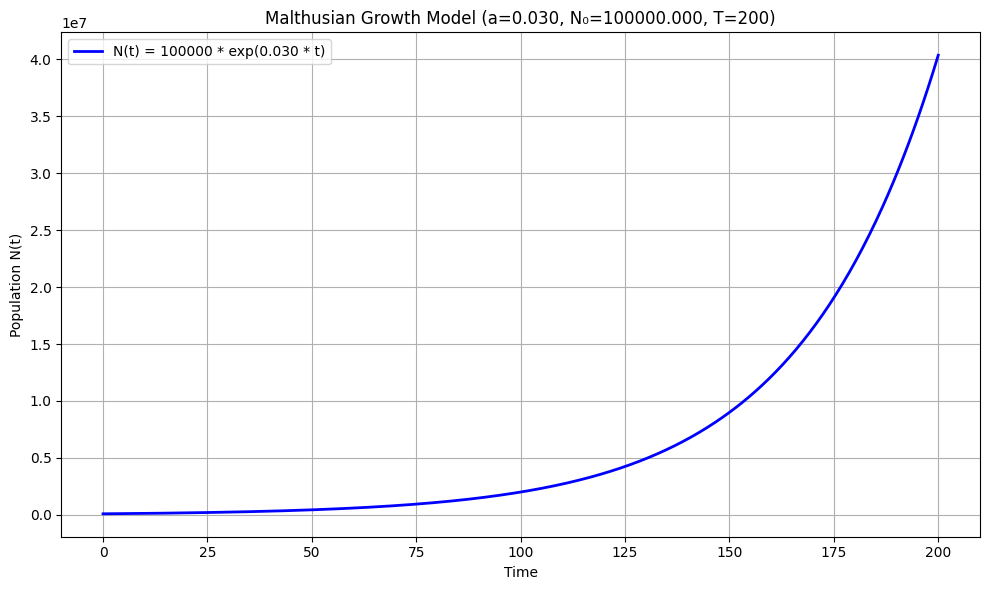

In [113]:
plot_malthus_solution(a=0.03, N0=100_000, max_time=200)

## Логістичне рівняння

Модель мальтуса розглядалася, коли для розмноження популяції створені найсприятливіші умови і відсутні лімітуючі фактори. Проте сприятливі для розмноження умови не можуть довго існувати через вплив навколишнього середовища, присутність ворогів та інших несприятливих факторів, що значно зменшує швидкість зростання її чисельності.

У моделі Мальтуса для чисельності особин в ізольованій популяції при нерівних коефіцієнтах народжуваності та смертності існують лише дві альтернативи: або нескінченний ріст, або виродження.

Оскільки в реальній дійсності спостерігається стабілізація чисельності популяції на деякому рівні, то необхідно розглядати математичні моделі, в яких густина популяції відіграє важливу роль, тобто коефіцієнт розмноження в такій моделі не постійний, а залежить від чисельності особин у популяції. Отже, точніша математична модель вигляду:

$$
\frac{dN}{dt} = F(N) N, \qquad (1)
$$

де $F(N)$ коефіцієнт швидкості відтворення популяції.

Розкладаючи функцію $F(N)$ у ряд Тейлора, в околі нуля та залишаючи тільки лінійні члени, прийдемо до рівняння:

$$
\frac{dN}{dt} = (a + bN) N
$$

де $a$ і $b$ - деякі сталі, причому природно припустити, що $a$ > 0 і $b$ < 0.

### Модель Ферхюльста

Модель:

$$
\frac{dN}{dt} = r\left(1 - \frac{N}{K}\right)N, \qquad (2)
$$

де $r$, $K$ - додатні константи: 

- $r$ задає коефіцієнт природного відтворення - мальтузіанський параметр;

- $K$ інтерпретується як потенціальна ємність екологічного середовища, яка визначається доступною кількістю ресурсів.

Модель уже враховує внутрішньовидову конкуренцію та дію лімітуючих факторів (нестача їжі, площі, світла).

Розв'язок рівняння (2) при початковій умові $N(0) = N_0$ має вигляд:

$$
N(t) = \frac{N_0 K}{N_0 + \left(K - N_0\right) e^{-rt}} \qquad (3)
$$

$K$ - визначає граничне значення чисельності популяції (чисельність не зростає безмежно, а обмежена зверху).

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output

def logistic_analytical(t, r, K, N0):
    """
    Analytical solution of the logistic growth equation:
    N(t) = N0 * K / (N0 + (K - N0) * exp(-r * t))
    """
    return (N0 * K) / (N0 + (K - N0) * np.exp(-r * t))

def plot_logistic_solution(r=0.16, K=100, N0=10, max_time=200):
    """
    Plot the analytical solution for the logistic growth model.
    """
    clear_output(wait=True)
    
    # Time array
    t = np.linspace(0, max_time, 500)
    
    # Compute the population using the analytical solution
    N = logistic_analytical(t, r, K, N0)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(t, N, 'b-', lw=1.5, label=f'N₀={N0}, r={r}, K={K}')
    ax.axhline(y=K, color='k', linestyle='--', label=f'Carrying Capacity (K={K})', lw=1.5)
    ax.set_xlabel('Time')
    ax.set_ylabel('Population N(t)')
    ax.grid(True)
    ax.legend()
    ax.set_title(f'Logistic Growth Model (Analytical Solution: r={r:.3f}, K={K:.3f}, N₀={N0:.3f}, T={max_time})')
    
    plt.tight_layout()
    plt.show()

# Interactive interface
interact(plot_logistic_solution,
         r=FloatSlider(min=0.05, max=0.5, step=0.001, value=0.16, description='r'),
         K=FloatSlider(min=10, max=500, step=1, value=100, description='K'),
         N0=FloatSlider(min=1, max=100, step=1, value=10, description='N₀'),
         max_time=FloatSlider(min=50, max=500, step=1, value=200, description='T'))


interactive(children=(FloatSlider(value=0.16, description='r', max=0.5, min=0.05, step=0.001), FloatSlider(val…

<function __main__.plot_logistic_solution(r=0.16, K=100, N0=10, max_time=200)>

На відміну від моделі Хатчинсона, в моделі Ферхюльста - не важливо які значення приймають параметри $r$ та $K$ в рамках області визначення, функція - буде логістичною.

#### Порівняння особливостей роботи моделі для різних наборів вхідних параметрів

In [136]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_analytical(t, r, K, N0):
    """
    Analytical solution of the logistic growth equation:
    N(t) = N0 * K / (N0 + (K - N0) * exp(-r * t))
    """
    return (N0 * K) / (N0 + (K - N0) * np.exp(-r * t))

def compare_logistic_parameters(param_name, param_values, fixed_params, max_time=200):
    """
    Compare the analytical solutions of the logistic model for different values of a specified parameter,
    while showing the fixed values of other parameters.
    
    Parameters:
        param_name (str): The name of the parameter to vary ('r', 'K', 'N0').
        param_values (list): List of values for the parameter to compare.
        fixed_params (dict): Dictionary of fixed parameters ('r', 'K', 'N0').
        max_time (float): Maximum time for the simulation (default is 200).
    """
    # Extract values of the fixed parameters for labeling
    r_fixed = fixed_params['r']
    K_fixed = fixed_params['K']
    N0_fixed = fixed_params['N0']
    
    # Time array
    t = np.linspace(0, max_time, 500)
    
    # Create a figure with individual subplots
    fig, axes = plt.subplots(1, len(param_values), figsize=(5 * len(param_values), 5), constrained_layout=True)
    
    if len(param_values) == 1:  # Handle case with one subplot
        axes = [axes]
    
    # Iterate over the parameter values to be compared
    for i, value in enumerate(param_values):
        # Copy the fixed parameters and set the current parameter value
        params = fixed_params.copy()
        params[param_name] = value
        
        # Compute the population using the analytical solution
        N = logistic_analytical(t, params['r'], params['K'], params['N0'])
        
        # Plot the result
        axes[i].plot(t, N, 'b-', lw=1.5, label=f'{param_name}={value}')
        axes[i].axhline(y=params['K'], color='k', linestyle='--', label=f'K={params["K"]}', lw=1.0)
        axes[i].set_title(f'{param_name}={value}\n(r={r_fixed}, K={K_fixed}, N₀={N0_fixed})')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('N(t)')
        axes[i].grid(True)
        axes[i].legend()
    
    plt.show()




##### 1. Мала ємність середовища 

In [146]:
# Example usage
fixed_parameters = {
    'r': 0.16, 
    'K': 1, 
    'N0': 0.9
}

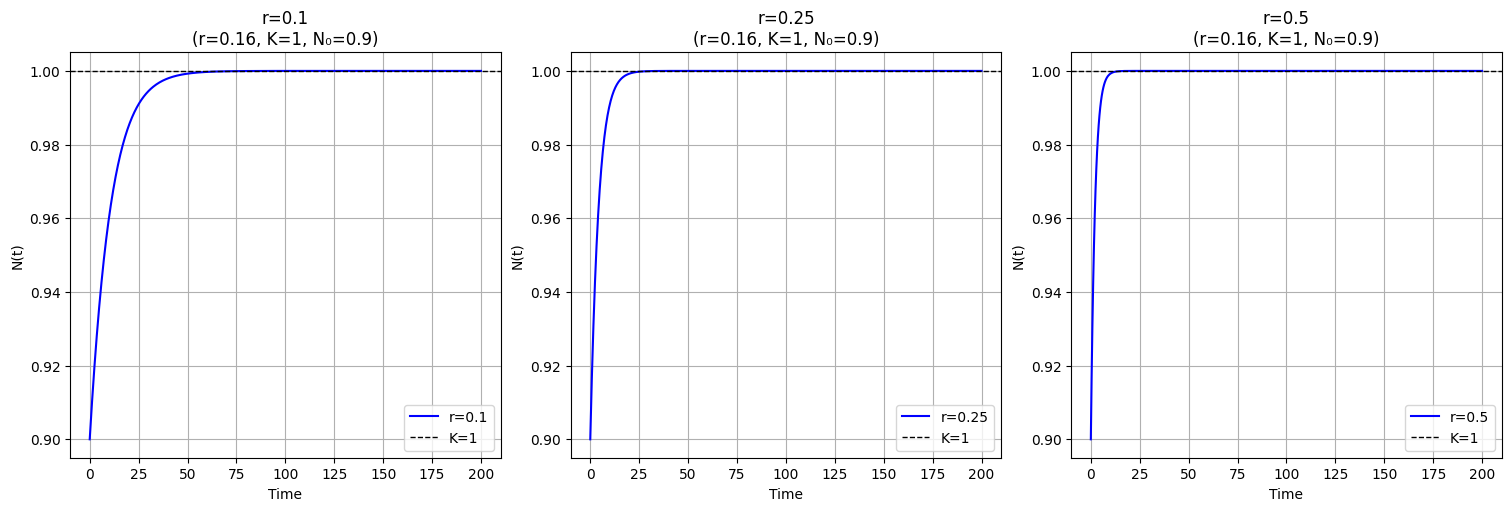

In [147]:
compare_logistic_parameters(param_name='r',
                            param_values=[0.1, 0.25, 0.5],
                            fixed_params=fixed_parameters,
                            max_time=200)

Результати вийшли схожими до отриманих при застосуванні моделі Хатчинсона з відповідними параметрами. Єдиною відмінністю є неврахування затримання $\tau$. Що може свідчити про адекватність реалізованої моделі (моделі Хатчинсона).

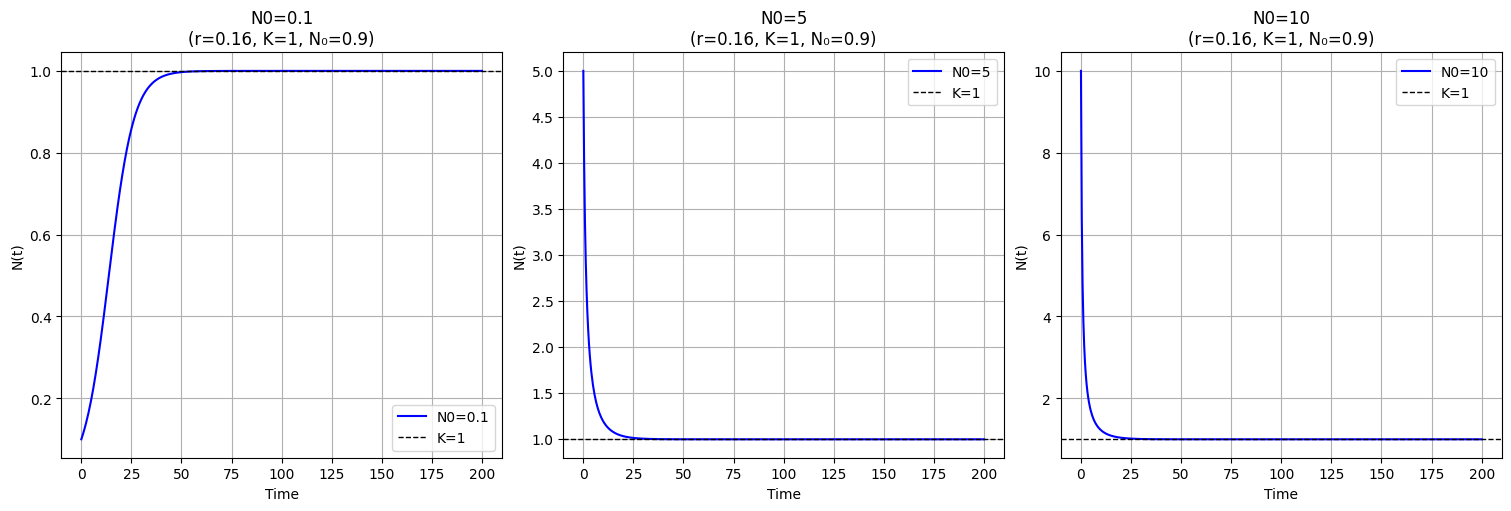

In [148]:
compare_logistic_parameters(param_name='N0',
                            param_values=[0.1, 5, 10],
                            fixed_params=fixed_parameters,
                            max_time=200)

Як можна побачити, графіки є схожими до отриманих в моделі Хатчинсона, але має місце відсутність запізнення. 

Для аналогічних графіків моделі Хатчинсона, але з більшим запізненням - графіки приймають хвилястий вигляд. Чисельність зрілої популяції - то зростає вище ємності середовища, то спадає до 0.

В даному ж випадку, оскілки запізнення не враховується, має місце логістична функція.

##### 2. Велика ємність середовища 

In [150]:
# Example usage
fixed_parameters = {
    'r': 0.16, 
    'K': 1000, 
    'N0': 0.9
}

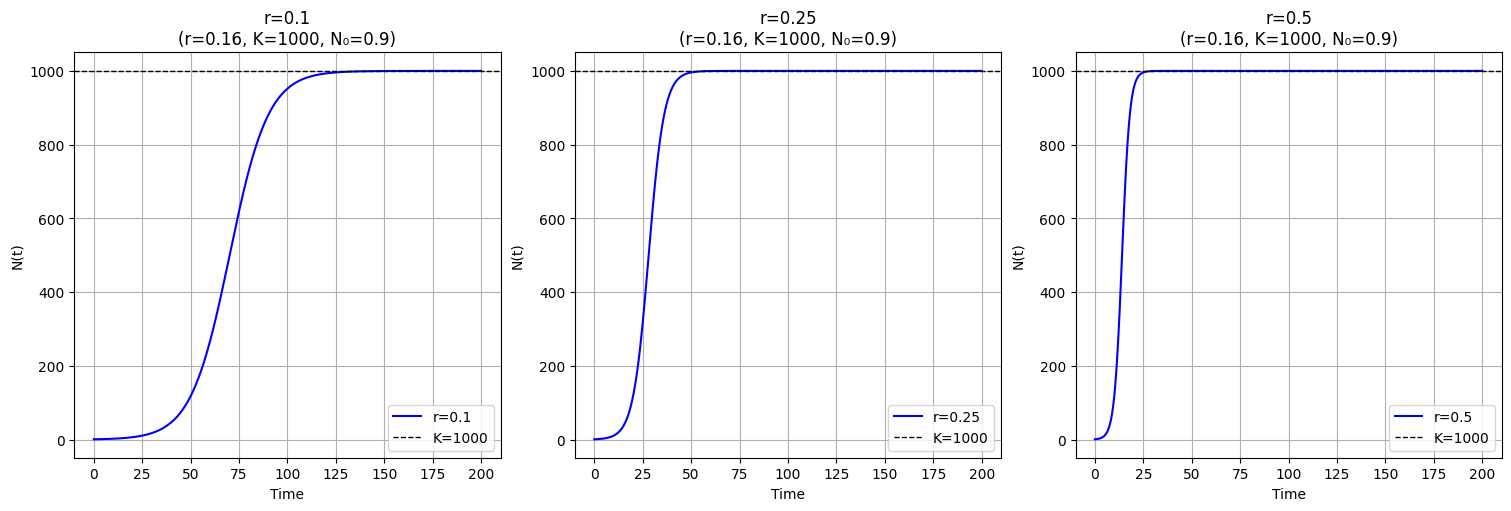

In [151]:
compare_logistic_parameters(param_name='r',
                            param_values=[0.1, 0.25, 0.5],
                            fixed_params=fixed_parameters,
                            max_time=200)

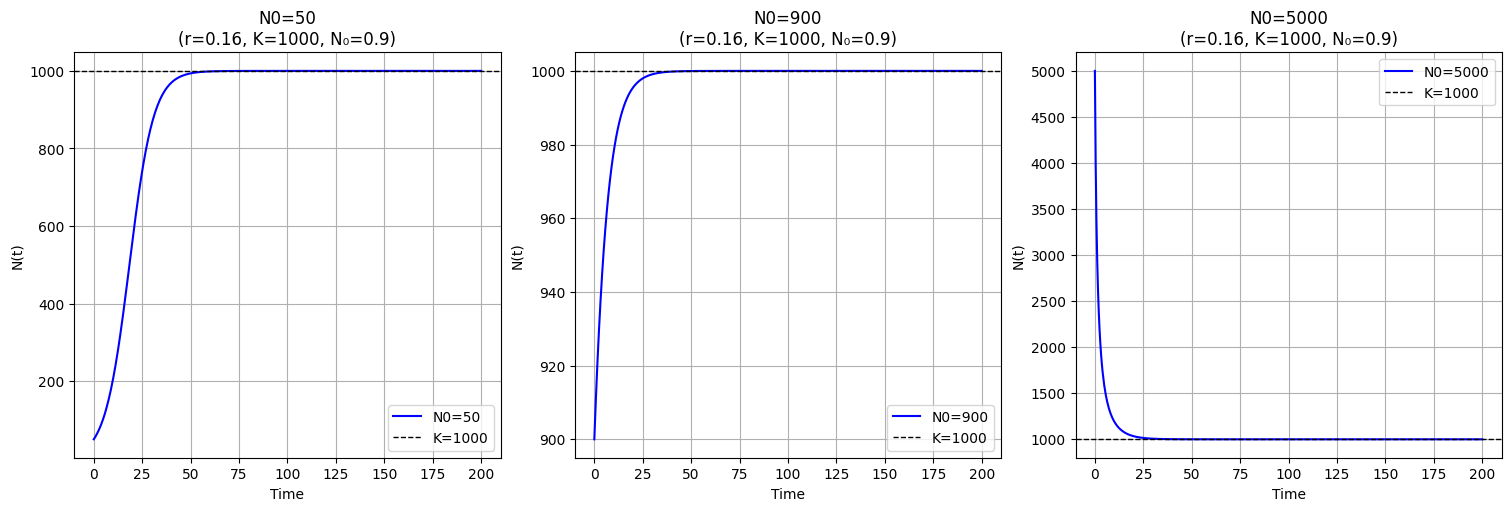

In [153]:
compare_logistic_parameters(param_name='N0',
                            param_values=[50, 900, 5000],
                            fixed_params=fixed_parameters,
                            max_time=200)

Порівнюючи отримані графіки роботи моделі Ферхюльста з графіками моделі Хатчинсона з високими значеннями параметру ємності середовища, але з низьким значенням параметру запізнення $\tau$ можна помітити, що зі зниженням значення $\tau$ модель стає подібно до моделі Ферхюльста, а при $\tau = 0$ - вироджується в модель Ферхюльста. 

Така схожість поведінки моделей при схожих наборах параметрів також вказує на те, що реалізація моделі вийшла цілком адекватною.

# Порівняння моделей на одному графіку

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, VBox, HBox, interactive_output
from IPython.display import display, clear_output

# Hutchinson Model Functions
def initial_condition(t, N0):
    return N0 * np.cos(0.01 * t)

def get_delayed_value(N, i, n_delay, t, tau, N0):
    if i < n_delay:
        return initial_condition(t - tau, N0)
    return N[i - n_delay]

def dN_dt(N_t, N_tau, r, K):
    return r * N_t * (1 - N_tau/K)

def solve_delay_logistic_rk4(r, K, tau, N0, t_max=200, dt=0.001):
    t = np.arange(0, t_max, dt)
    n_points = len(t)
    n_delay = int(tau/dt)
    N = np.zeros(n_points)
    N[:n_delay] = initial_condition(t[:n_delay], N0)
    for i in range(n_delay - 1, n_points - 1):
        t_i = t[i]
        N_i = N[i]
        N_tau = get_delayed_value(N, i, n_delay, t_i, tau, N0)
        k1 = dN_dt(N_i, N_tau, r, K)
        N_tau = get_delayed_value(N, i + 1//2, n_delay, t_i + dt/2, tau, N0)
        k2 = dN_dt(N_i + dt*k1/2, N_tau, r, K)
        N_tau = get_delayed_value(N, i + 1//2, n_delay, t_i + dt/2, tau, N0)
        k3 = dN_dt(N_i + dt*k2/2, N_tau, r, K)
        N_tau = get_delayed_value(N, i + 1, n_delay, t_i + dt, tau, N0)
        k4 = dN_dt(N_i + dt*k3, N_tau, r, K)
        N[i + 1] = N_i + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    return t, N, n_delay

# Malthusian Model Functions
def malthus_population(t, N0, a):
    return N0 * np.exp(a * t)

# Logistic Model Functions
def logistic_analytical(t, r, K, N0):
    return K / (1 + ((K - N0) / N0) * np.exp(-r * t))

# Unified Plotting Function
def plot_models(r_h=0.16, K_h=1.1, tau_h=10, N0_h=1.0, r_l=0.16, K_l=100, N0_l=10, a_m=0.1, N0_m=1.0, max_time=200):
    clear_output(wait=True)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Hutchinson Model
    t_h, N_h, n_delay_h = solve_delay_logistic_rk4(r_h, K_h, tau_h, N0_h, t_max=max_time)
    skip_points_h = n_delay_h
    ax.plot(t_h[skip_points_h:], N_h[skip_points_h:], label=f'Hutchinson (r={r_h}, K={K_h}, τ={tau_h}, N0={N0_h})')
    if r_h * tau_h >= np.pi / 2:
        print("Caution, Hutchinson result may be unstable! Check r and τ parameters.")
    
    # Logistic Model
    t_l = np.linspace(0, max_time, 500)
    N_l = logistic_analytical(t_l, r_l, K_l, N0_l)
    ax.plot(t_l, N_l, label=f'Logistic (r={r_l}, K={K_l}, N0={N0_l})')
    
    # Malthusian Model
    t_m = np.linspace(0, max_time, 500)
    N_m = malthus_population(t_m, N0_m, a_m)
    ax.plot(t_m, N_m, label=f'Malthusian (a={a_m}, N0={N0_m})')
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Population N(t)')
    ax.grid(True)
    ax.legend()
    ax.set_title(f'Growth Models Comparison (T={max_time})')
    
    plt.tight_layout()
    plt.show()

# Define sliders for all models
r_h_slider = FloatSlider(min=0.05, max=1.4, step=0.001, value=0.16, description='r (Hutchinson)')
K_h_slider = FloatSlider(min=0.5, max=1000.0, step=0.001, value=1.1, description='K (Hutchinson)')
tau_h_slider = FloatSlider(min=0.001, max=20.0, step=0.001, value=10, description='τ (Hutchinson)')
N0_h_slider = FloatSlider(min=0.1, max=2000, step=0.1, value=1.0, description='N0 (Hutchinson)')
r_l_slider = FloatSlider(min=0.05, max=1.4, step=0.001, value=0.16, description='r (Logistic)')
K_l_slider = FloatSlider(min=0.5, max=1000.0, step=0.001, value=100, description='K (Logistic)')
N0_l_slider = FloatSlider(min=0.1, max=2000, step=0.1, value=10, description='N0 (Logistic)')
a_m_slider = FloatSlider(min=0.01, max=1.0, step=0.001, value=0.1, description='a (Malthusian)')
N0_m_slider = FloatSlider(min=0.1, max=2000, step=0.1, value=1.0, description='N0 (Malthusian)')
max_time_slider = FloatSlider(min=50, max=500, step=1, value=200, description='T')

# Create a VBox for the sliders
sliders = VBox([r_h_slider, K_h_slider, tau_h_slider, N0_h_slider, r_l_slider, K_l_slider, N0_l_slider, a_m_slider, N0_m_slider, max_time_slider])

# Create interactive plot with sliders on the right side
ui = HBox([sliders, interactive_output(plot_models, {'r_h': r_h_slider, 'K_h': K_h_slider, 'tau_h': tau_h_slider, 'N0_h': N0_h_slider, 'r_l': r_l_slider, 'K_l': K_l_slider, 'N0_l': N0_l_slider, 'a_m': a_m_slider, 'N0_m': N0_m_slider, 'max_time': max_time_slider})])
display(ui)

interactive(children=(FloatSlider(value=0.16, description='r (Hutchinson)', max=1.4, min=0.05, step=0.001), Fl…

<function __main__.plot_models(r_h=0.16, K_h=1.1, tau_h=10, N0_h=1.0, r_l=0.16, K_l=100, N0_l=10, a_m=0.1, N0_m=1.0, max_time=200)>

# Висновки

У даній курсовій роботі було проведено дослідження математичного моделювання росту чисельності ізольованих популяцій, з особливим фокусом на модель Хатчинсона. Робота включала як теоретичний аналіз моделі, так і її практичну реалізацію з подальшим порівнянням з іншими класичними моделями популяційної динаміки.

Теоретична частина дослідження показала, що модель Хатчинсона є суттєвим удосконаленням логістичної моделі завдяки врахуванню ефекту запізнення τ, що відображає біологічно важливий час між зачаттям і народженням, а також період статевого дозрівання особин. Математичний аналіз моделі виявив, що при 0 < a₁ < π/2 (де a₁ = rτ) нетривіальна рівновага в рівнянні із запізненням є стійкою.

**В ході комп'ютерного моделювання було досліджено поведінку системи при різних комбінаціях параметрів та виявлено наступні закономірності:**

1. При малих значеннях запізнення τ та малій ємності середовища K:

    - Система швидко досягає стану рівноваги

    - Збільшення коефіцієнта r прискорює досягнення рівноважного стану

    - Поведінка системи наближається до логістичної моделі

    - Початкова чисельність популяції суттєво впливає лише на швидкість досягнення рівноваги


2. При великій ємності середовища K та малому τ:

    - Збільшення r прискорює досягнення рівноваги

    - Динаміка зберігає характер логістичної кривої


2. При великих значеннях запізнення τ:

    - Виникають коливання чисельності популяції через ефект запізнення

    - Збільшення параметра r може призвести до вимирання статево зрілої частки популяції

    - При певних значеннях параметрів спостерігається хвилеподібна динаміка

    - Амплітуда коливань може поступово зменшуватись



**Порівняльний аналіз з іншими моделями показав:**

- Модель Мальтуса описує необмежене експоненційне зростання, що рідко спостерігається в природі та не враховує обмеженість ресурсів

- Модель Ферхюльста враховує обмеженість ресурсів, але ігнорує ефект запізнення

- Модель Хатчинсона при τ = 0 вироджується в модель Ферхюльста

- При τ > 0 модель Хатчинсона може демонструвати складнішу динаміку, включаючи коливання та нестійкість

Проведене дослідження підтверджує, що модель Хатчинсона є найбільш досконалим інструментом серед розглянутих моделей для опису динаміки реальних популяцій, оскільки враховує важливі біологічні параметри (час дозрівання, затримку розмноження).

Реалізована комп'ютерна модель може бути використана для подальших досліджень у галузі популяційної екології та для прогнозування динаміки реальних популяцій при відомих параметрах системи.

## Використані джерела

1. Маценко В . Г . Математичне моделювання: навчальний посібник c. 323 - 329